## Getting started with `cartopy`

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [25]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

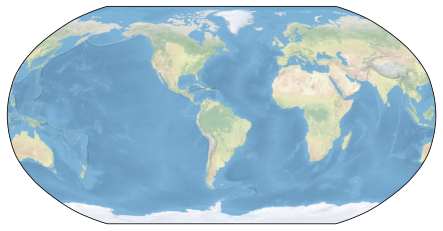

In [26]:
# use matplotlib's built-in transform support, same function calls
fig = plt.figure(figsize=(10, 4))
axm = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=300.))

# set the extent to global
axm.set_global()

# add standard background map
axm.stock_img()

In [27]:
import scipy

## Plotting a global contour map 

Load a dataset of dissolved oxygen concentration in the thermocline (400-600 m depth).

In [28]:
import xarray as xr
ds = xr.open_dataset('woa18_all_o00_01.nc', decode_times=False)
ds

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
  * depth               (depth) float32 0.0 5.0 10.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time                (time) float32 8.214e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    o_an                (time, depth, lat, lon) float32 ...
    o_mn                (time, depth, lat, lon) float32 ...
    o_dd                (time, depth, lat, lon) float64 ...
    o_sd                (time, depth, lat, lon) float32 ...
    o_se                (time, depth, lat, lon) float32 ...
    o_oa                (time, depth, lat, lon) float32 ...
    o_gp                (time, depth, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : mole_concentrat...
    summary:                         Climatological mean dissolved oxygen for...
    references:                      Garcia, H. E., K. Weathers, C. R. Paver,...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29

In [29]:
ds.attrs

{'Conventions': 'CF-1.6, ACDD-1.3',
 'title': 'World Ocean Atlas 2018 : mole_concentration_of_dissolved_molecular_oxygen_in_sea_water Annual  1.00 degree',
 'summary': 'Climatological mean dissolved oxygen for the global ocean from in situ oceanographic profile data',
 'references': 'Garcia, H. E., K. Weathers, C. R. Paver, I. Smolyar, T. P. Boyer, R. A. Locarnini, M. M. Zweng, A. V. Mishonov, O. K. Baranova, D. Seidov, and J. R. Reagan, 2019. World Ocean Atlas 2018, Volume 3: Dissolved Oxygen, Apparent Oxygen Utilization, and Oxygen Saturation.  A. V. Mishonov, Technical Ed., NOAA Atlas NESDIS 83',
 'institution': 'National Centers for Environmental Information (NCEI)',
 'comment': 'global climatology as part of the World Ocean Atlas project',
 'id': 'woa18_all_o00_01.nc',
 'naming_authority': 'gov.noaa.ncei',
 'sea_name': 'World-Wide Distribution',
 'time_coverage_start': '1900-01-01',
 'time_coverage_end': '2017-12-31',
 'time_coverage_duration': 'P!!Y',
 'time_coverage_resolution':

In [30]:
#ds.keys()
ds.o_an

<xarray.DataArray 'o_an' (time: 1, depth: 102, lat: 180, lon: 360)>
[6609600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
  * time     (time) float32 8.214e+03
Attributes:
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    long_name:      Objectively analyzed mean fields for mole_concentration_o...
    cell_methods:   area: mean depth: mean time: mean within years time: mean...
    grid_mapping:   crs
    units:          micromoles_per_kilogram

In [31]:
ds.coords['depth']

<xarray.DataArray 'depth' (depth: 102)>
array([0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01, 2.50e+01, 3.00e+01,
       3.50e+01, 4.00e+01, 4.50e+01, 5.00e+01, 5.50e+01, 6.00e+01, 6.50e+01,
       7.00e+01, 7.50e+01, 8.00e+01, 8.50e+01, 9.00e+01, 9.50e+01, 1.00e+02,
       1.25e+02, 1.50e+02, 1.75e+02, 2.00e+02, 2.25e+02, 2.50e+02, 2.75e+02,
       3.00e+02, 3.25e+02, 3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02,
       4.75e+02, 5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02, 7.00e+02, 7.50e+02,
       8.00e+02, 8.50e+02, 9.00e+02, 9.50e+02, 1.00e+03, 1.05e+03, 1.10e+03,
       1.15e+03, 1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03, 1.40e+03, 1.45e+03,
       1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03, 1.70e+03, 1.75e+03, 1.80e+03,
       1.85e+03, 1.90e+03, 1.95e+03, 2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03,
       2.40e+03, 2.50e+03, 2.60e+03, 2.70e+03, 2.80e+03, 2.90e+03, 3.00e+03,
       3.10e+03, 3.20e+03, 3.30e+03, 3.40e+03, 3.50e+03, 3.60e+03, 3.70e+03,
       3.80e+03, 3.90e+03, 4.00e+03, 4.10e+03, 4.20e+03, 4.30e+03, 4.40e+03,
       4.50e+03, 4.60e+03, 4.70e+03, 4.80e+03, 4.90e+03, 5.00e+03, 5.10e+03,
       5.20e+03, 5.30e+03, 5.40e+03, 5.50e+03], dtype=float32)
Coordinates:
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Attributes:
    standard_name:  depth
    bounds:         depth_bnds
    positive:       down
    units:          meters
    axis:           Z

In [32]:
ds.variables

Frozen({'crs': <xarray.Variable ()>
array(-2147483647, dtype=int32)
Attributes:
    grid_mapping_name:            latitude_longitude
    epsg_code:                    EPSG:4326
    longitude_of_prime_meridian:  0.0
    semi_major_axis:              6378137.0
    inverse_flattening:           298.25723, 'lat': <xarray.IndexVariable 'lat' (lat: 180)>
array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5, -80.5,
       -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5, -71.5, -70.5,
       -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5, -62.5, -61.5, -60.5,
       -59.5, -58.5, -57.5, -56.5, -55.5, -54.5, -53.5, -52.5, -51.5, -50.5,
       -49.5, -48.5, -47.5, -46.5, -45.5, -44.5, -43.5, -42.5, -41.5, -40.5,
       -39.5, -38.5, -37.5, -36.5, -35.5, -34.5, -33.5, -32.5, -31.5, -30.5,
       -29.5, -28.5, -27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5,
       -19.5, -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5

In [33]:
lats = ds.variables['lat'][:]
lons = ds.variables['lon'][:]
#lats

### Use `xarray`'s hooks to `matplotlib` to create a quick-look plot

In [34]:
depth200 = ds.sel(depth='200')
depth200

depth300 = ds.sel(depth='300')
depth300

<xarray.Dataset>
Dimensions:             (lat: 180, nbounds: 2, lon: 360, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
    depth               float32 300.0
  * time                (time) float32 8.214e+03
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 -2147483647
    lat_bnds            (lat, nbounds) float32 -90.0 -89.0 -89.0 ... 89.0 90.0
    lon_bnds            (lon, nbounds) float32 -180.0 -179.0 ... 179.0 180.0
    depth_bnds          (nbounds) float32 287.5 312.5
    climatology_bounds  (time, nbounds) float32 7.512e+03 8.928e+03
    o_an                (time, lat, lon) float32 ...
    o_mn                (time, lat, lon) float32 ...
    o_dd                (time, lat, lon) float64 ...
    o_sd                (time, lat, lon) float32 ...
    o_se                (time, lat, lon) float32 ...
    o_oa                (time, lat, lon) float32 ...
    o_gp                (time, lat, lon) float64 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : mole_concentrat...
    summary:                         Climatological mean dissolved oxygen for...
    references:                      Garcia, H. E., K. Weathers, C. R. Paver,...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-29 
    date_modified:                   2019-07-29

In [35]:
O2_200=depth200['o_an']
O2_200

O2_300=depth300['o_an']
O2_300

#ds.drop(dims='time')
O2_200=O2_200.squeeze('time')

O2_300=O2_300.squeeze('time')

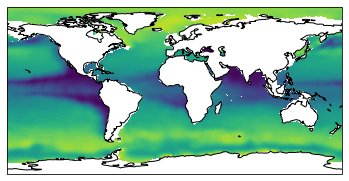

In [36]:
ax = plt.axes(projection=ccrs.PlateCarree())

plt.contourf(lons, lats, O2_200, 60,
             transform=ccrs.PlateCarree())

ax.coastlines()

plt.show()

### Colormap normalization

- Objects that use colormaps by default linearly map the colors in the colormap from data values vmin to vmax.
- [Colormap normalization](https://matplotlib.org/3.1.0/tutorials/colors/colormapnorms.html) provides a means of manipulating the mapping. 

For instance:

In [37]:
import matplotlib.colors as colors
norm = colors.Normalize(vmin=-1, vmax=1.)
norm(0.)

0.5

We can map data to colormaps in a non-linear fashion using other normalizations, for example:

In [38]:
norm = colors.LogNorm(vmin=1e-2, vmax=1e2)
np.array(norm([0.01, 0.1, 1., 10., 100.]))

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### ...back to oxygen
Set contour levels to non-uniform intervals and make the colormap centered at the hypoxic threshold using `DivergingNorm`.

In [39]:
levels = [0, 10, 20,  30, 40, 50, 60, 80, 100, 125, 150, 175, 200, 225, 
          250, 275, 300]

norm = colors.TwoSlopeNorm(vmin=levels[0], vmax=levels[-1], vcenter=60.)

Add a cyclic point to accomodate the periodic domain.

In [40]:
from cartopy.util import add_cyclic_point
field, lon = add_cyclic_point(O2_200, coord=lons)
#lat = ds.lat

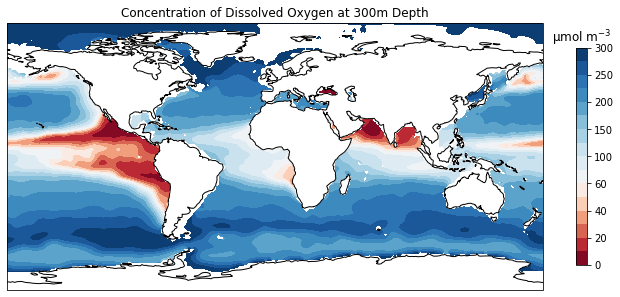

In [103]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

cf = ax.contourf(lons, lats, O2_300, 60,levels=levels, norm=norm, cmap='RdBu',
             transform=ccrs.PlateCarree())

ax.coastlines()
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('μmol m$^{-3}$')
ax.set_title('Concentration of Dissolved Oxygen at 300m Depth');
plt.savefig('O2_concentrations_300m.png', dpi=300, bbox_inches='tight')
plt.show()

In [104]:
import pandas
sampling=pandas.read_excel(r'all_ODZ_sampling_information.xlsx', header=2, index_col=0)
sample_latitude=sampling.latitude
sample_longitude=sampling.longitude
sample_latitude
sample_longitude

JGI sample number
AMALJGI-DNA-1    -104.416465
AMALJGI-DNA-2    -104.416465
AMALJGI-DNA-3    -104.416465
AMALJGI-DNA-5    -110.711400
AMALJGI-DNA-7    -110.711400
AMALJGI-DNA-8    -110.711400
AMALJGI-DNA-9      64.000000
AMALJGI-DNA-10     64.000000
AMALJGI-DNA-11     64.000000
AMALJGI-DNA-12     64.000000
AMALJGI-DNA-13   -105.000000
AMALJGI-DNA-14   -105.000000
AMALJGI-DNA-15   -105.000000
AMALJGI-DNA-18   -102.000000
AMALJGI-DNA-17   -102.000000
AMALJGI-DNA-19   -102.000000
Fuchsman-136     -106.500000
Fuchsman-BB2     -107.148000
Glass-2          -108.800000
Glass-4          -106.300000
Glass-6          -104.500000
Glass-10         -104.700000
Tsementzi        -104.540000
Stewart           -70.383333
Ganesh            -70.800000
Name: longitude, dtype: float64

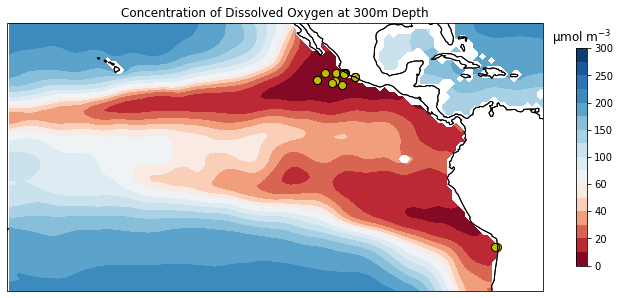

In [183]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.set_extent([-60, -180, -30, 30], ccrs.PlateCarree())

cf = ax.contourf(lons, lats, O2_300, 60,levels=levels, norm=norm, cmap='RdBu',
             transform=ccrs.PlateCarree())

ax.coastlines()
ax.scatter(sample_longitude,sample_latitude,s=65,c='y',edgecolor='black',alpha=1, transform=ccrs.PlateCarree());
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('μmol m$^{-3}$')
ax.set_title('Concentration of Dissolved Oxygen at 300m Depth');
plt.savefig('O2_concentrations_300m_with_sampling_Pacific.png', dpi=300, bbox_inches='tight')
plt.show()

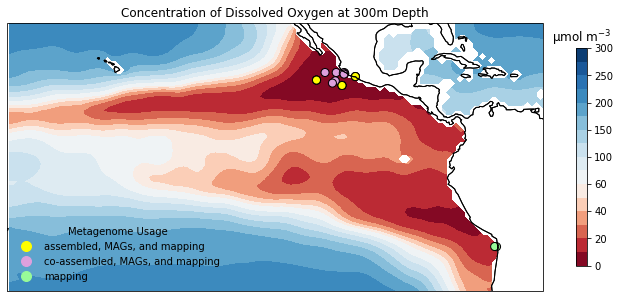

In [184]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.set_extent([-60, -180, -30, 30], ccrs.PlateCarree())

cf = ax.contourf(lons, lats, O2_300, 60,levels=levels, norm=norm, cmap='RdBu',
             transform=ccrs.PlateCarree())
ax.coastlines()

colors = {'assembled, MAGs, and mapping':'yellow', 'co-assembled, MAGs, and mapping':'plum', 'mapping':'palegreen'}

plot = ax.scatter(sample_longitude,sample_latitude,s=65,c=sampling.assembled.map(colors),
           edgecolor='black',alpha=1, transform=ccrs.PlateCarree());
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('μmol m$^{-3}$')


color_patch = ["yellow", "plum", "palegreen"]
texts = ["assembled, MAGs, and mapping", "co-assembled, MAGs, and mapping","mapping"]
patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=color_patch[i], 
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches, loc='lower left', ncol=1, title="Metagenome Usage",frameon=False,
        numpoints=1)

ax.set_title('Concentration of Dissolved Oxygen at 300m Depth');
plt.savefig('O2_concentrations_300m_with_sampling_Pacific.png', dpi=300, bbox_inches='tight')
plt.show()

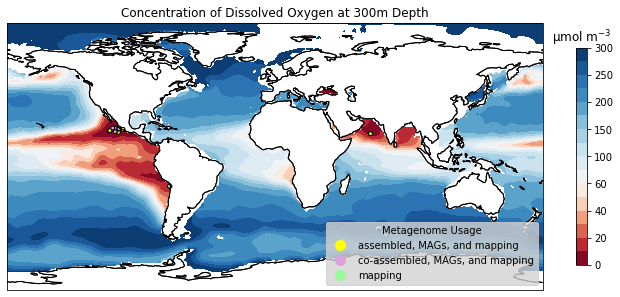

In [192]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
#ax.set_extent([-60, -180, -30, 30], ccrs.PlateCarree())

cf = ax.contourf(lons, lats, O2_300, 60,levels=levels, norm=norm, cmap='RdBu',
             transform=ccrs.PlateCarree())
ax.coastlines()

colors = {'assembled, MAGs, and mapping':'yellow', 'co-assembled, MAGs, and mapping':'plum', 'mapping':'palegreen'}

plot = ax.scatter(sample_longitude,sample_latitude,s=15,c=sampling.assembled.map(colors),
           edgecolor='black',alpha=1, transform=ccrs.PlateCarree());
cb = plt.colorbar(cf, shrink=0.5)
cb.ax.set_title('μmol m$^{-3}$')


color_patch = ["yellow", "plum", "palegreen"]
texts = ["assembled, MAGs, and mapping", "co-assembled, MAGs, and mapping","mapping"]
patches = [plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=color_patch[i],
            label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

plt.legend(handles=patches, loc='lower right', ncol=1, title="Metagenome Usage", 
           facecolor="lightgray", numpoints=1)

ax.set_title('Concentration of Dissolved Oxygen at 300m Depth');
plt.savefig('O2_concentrations_300m_with_sampling.png', dpi=300, bbox_inches='tight')
plt.show()

